Loading the Data

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
#all urls of the case files 
urls = [
    "https://drive.google.com/uc?id=1v4QxQdFS1hwh3p_q7tl_31CPzHsF60cu",
    "https://drive.google.com/uc?id=13vzLzK-NZAlC4U2a-XHqdDqhMTn7o2AS",
    "https://drive.google.com/uc?id=1rzCjj1BXJ5aZHYcdxTfUq2VjYwpXIKWX",
    "https://drive.google.com/uc?id=1jYTGHR-MWXcRTWC29hiancE0v_xBkJQz",
    "https://drive.google.com/uc?id=1mEDzksTNbuizFL_swY2xPX_7zyc0zZRu",
    "https://drive.google.com/uc?id=1Oaj3AtAb_MMIpGmQ2obc3SioquJaWbVJ",
    "https://drive.google.com/uc?id=1J_2S4ZyKuUVEbAawi-X1pTi56CBIWEc7",
    "https://drive.google.com/uc?id=1cP_hhRKORpacHfN4qtYFVrysbebRSW_g",
    "https://drive.google.com/uc?id=1DTDlTmXRyagAncE9R-pUPVGZGom0AFn6",
    "https://drive.google.com/uc?id=1KHNDqFD0NrC9BlLHQkPQWyi-9G6mFQJ6",
    "https://drive.google.com/uc?id=10ltSNf6Fg7KKhHgPzTtoxm0di3nm61BM",
    "https://drive.google.com/uc?id=1-C74-j6QwUZIKikI8oLXsz70mRTXlDyi",
    "https://drive.google.com/uc?id=1M3f8ipQdR7dZxVEDl2q_TAxksacX9b-L"

    
    
]
#read in all of the urls
df = pd.concat([pd.read_csv(url) for url in urls], ignore_index = True)

Calculating Duration of Unionization Cases

In [149]:
#convert the date filed and date closed to date time
df['Date Filed'] = pd.to_datetime(df['Date Filed'])
df['Date Closed'] = pd.to_datetime(df['Date Closed'])

#Calculate duration of each case 
df['Case Duration (days)'] = (df['Date Closed'] - df['Date Filed']).dt.days

#Extract the year date filed and create a new column called year filed
df['Year Filed'] = df['Date Filed'].dt.year

#only take data in the time frame I am observing 2010 and on
filtered_df = df[df['Year Filed'] >= 2010]

#Ensure there are no duplicate entrys of union cases
duplicates = df[df.duplicated(subset=['Case Name', 'Case Duration (days)'], keep=False)]

#Drop any duplicate entrys from the data set because the same union case should not be observed twice
df = df.drop_duplicates(subset=['Case Name', 'Case Duration (days)'])

#ensures only correct dates are included
df = df[(df['Date Filed'].notna()) & (df['Date Closed'].notna()) & (df['Date Closed'] >= df['Date Filed'])]

#calculate the mean each year to find the average case duration by year
average_duration_by_year = filtered_df.groupby('Year Filed')['Case Duration (days)'].mean()

print(average_duration_by_year)





Year Filed
2010     90.861881
2011    102.905822
2012    101.606624
2013     96.019373
2014     87.615766
2015     77.154740
2016    281.592000
2017     67.872696
2018     75.176851
2019     63.390496
2020    109.857017
2021    103.925665
2022     94.571351
2023     58.007838
Name: Case Duration (days), dtype: float64


Line plot illustrating the trend of average unionization case duration over time

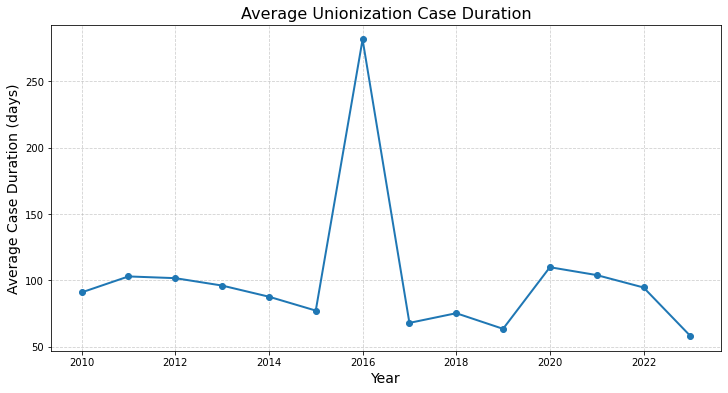

In [150]:
#Group filtered dataframe by year filed and calculate the average by year
average_duration_by_year = filtered_df.groupby('Year Filed')['Case Duration (days)'].mean()

# Plot data using MatPlotLib creating a line plot visualizing the average duration of unionization cases over time
plt.figure(figsize=(12, 6))
plt.plot(average_duration_by_year.index, average_duration_by_year.values, marker='o', linestyle='-', linewidth=2, label='Average Case Duration')
plt.title('Average Unionization Case Duration', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Case Duration (days)', fontsize=14)

#add grid to plot
plt.grid(True, linestyle='--', alpha=0.6)

# Show the chart
plt.show()

Stacked Bar Chart

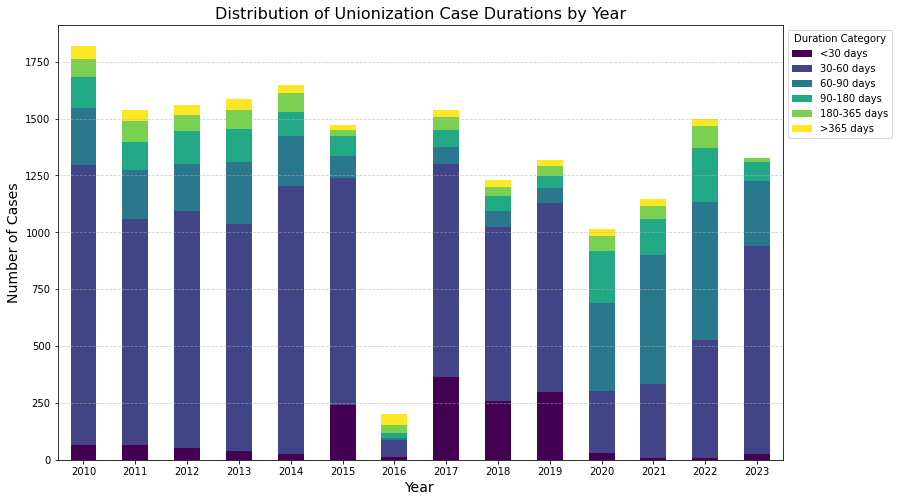

In [151]:
#Categorize case durations into intervals 
bins = [0, 30, 60, 90, 180, 365, float('inf')]
labels = ['<30 days', '30-60 days', '60-90 days', '90-180 days', '180-365 days', '>365 days']

#categorizes the case duration  column in the dataframe into specified ranges
df['Duration Category'] = pd.cut(df['Case Duration (days)'], bins=bins, labels=labels)

#filter data make sure only gettin the desired timeframe
filtered_df = df[df['Year Filed'] >= 2010]

#Count the number of categories by year
duration_counts = filtered_df.groupby(['Year Filed', 'Duration Category'], observed=False).size().unstack(fill_value=0)

#Create the stacked bar chart in MatPlotLib with the seaborn color scheme of viridis
duration_counts.plot(kind='bar', stacked=True, figsize=(13, 8), colormap='viridis')
plt.title('Distribution of Unionization Case Durations by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)

#Create a legend to understand each interval
plt.legend(title='Duration Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

#Rotate x lables to be horizontal
plt.xticks(rotation=0)
plt.show()

Calculating Unionization Success

In [152]:
#define all of the vote columbs because there are 3
vote_columns = ['Votes for Labor Union1', 'Votes for Labor Union2', 'Votes for Labor Union3']

#Set empty columns with 0, so they do not interfer with the data
df[vote_columns] = df[vote_columns].fillna(0)

#Find the highest vote in each column
df['Highest_Votes_For'] = df[vote_columns].max(axis=1)

#Use the highest Vote to determine if the unionization case was successful for employees, if the highest votes for wins, that means those in favor of unionization won (or succeeded)
df['Success'] = (df['Highest_Votes_For'] > df['Votes Against']).astype(int)


Bar Chart of Unionization Success Rate by Duration

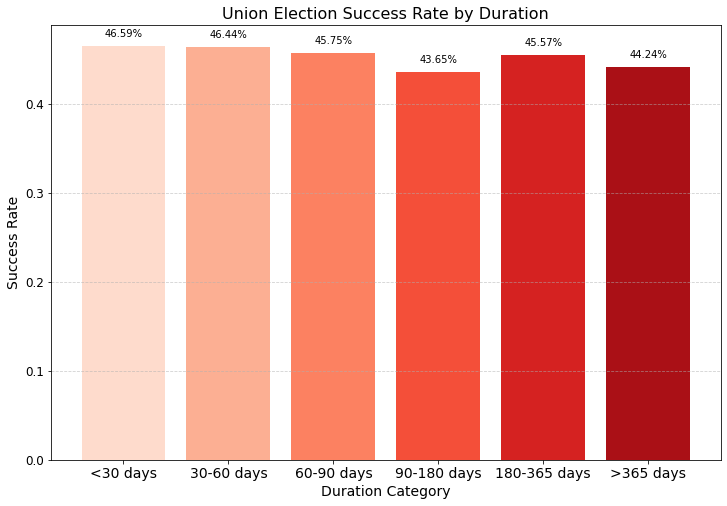

In [153]:
#Ensure data is filtering right timeline 
filtered_df = df[df['Year Filed'] >= 2010]

#Calculates the average success rate for each duration category
success_rate_by_duration = filtered_df.groupby('Duration Category', observed=False)['Success'].mean()

#sets the color of the bargraph to reds 
colors = sns.color_palette("Reds", len(success_rate_by_duration))

# Create a bar chart in MatPlotLib with success rates as y and duration category as X
plt.figure(figsize=(12, 8))
bars = plt.bar(success_rate_by_duration.index, success_rate_by_duration.values, color=colors)

# Add the exact values at the top of the bars 
#loop through the bars 
for bar in bars:
    #find the height
    height = bar.get_height()
    #place the text of the precise values above each bar
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{height:.2%}', ha='center', fontsize=10)

#Create labels of plot
plt.title('Union Election Success Rate by Duration', fontsize=16)
plt.xlabel('Duration Category', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
#add grid to plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Grouped Bar Chart of Sucess Rate of Unionization Cases and Duration

<Figure size 1008x576 with 0 Axes>

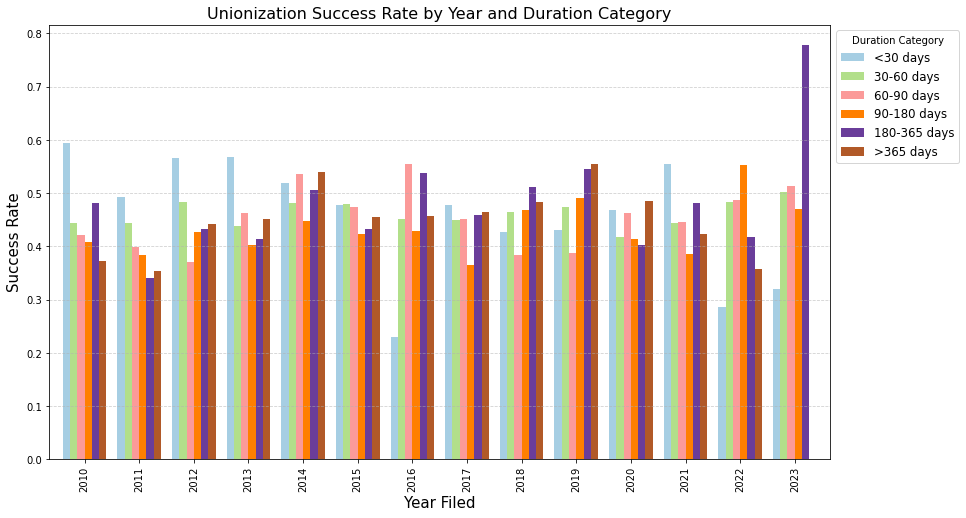

In [154]:
#had to reput success_rate_by_year_duration because code was not compiling if I didnt
success_rate_by_year_duration = filtered_df.groupby(['Year Filed', 'Duration Category', ], observed = False)['Success'].mean().unstack()

# Plot grouped bar chart with paired colorscheme in MatPlotLib
plt.figure(figsize=(14, 8))
success_rate_by_year_duration.plot(kind='bar', figsize=(14, 8), colormap='Paired', width=0.8)

#Create titles and lables for plot
plt.title('Unionization Success Rate by Year and Duration Category', fontsize=16)
plt.xlabel('Year Filed', fontsize=15)
plt.ylabel('Success Rate', fontsize=15)
plt.legend(title='Duration Category', bbox_to_anchor=(1, 1), loc='upper left', fontsize=11.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()